<a href="https://colab.research.google.com/github/kesavasivaNagaraju/FML-lab/blob/main/inkmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('/content/Boston.csv')

In [7]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
scaler = MinMaxScaler()

In [12]:
af = scaler.fit_transform(data[['crim','medv']])

In [13]:
df = pd.DataFrame(af,columns=['crim','medv'])

In [24]:
model = KMeans(n_clusters=5)


In [25]:
y = model.fit_predict(df[['crim','medv']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
model.cluster_centers_

array([[0.01094301, 0.36051086],
       [0.09885118, 0.17785375],
       [0.01688668, 0.93805556],
       [0.00629228, 0.58575758],
       [0.6249381 , 0.085     ]])

In [27]:
df['Clusters'] = model.labels_

In [28]:
import seaborn as sns

<Axes: xlabel='crim', ylabel='medv'>

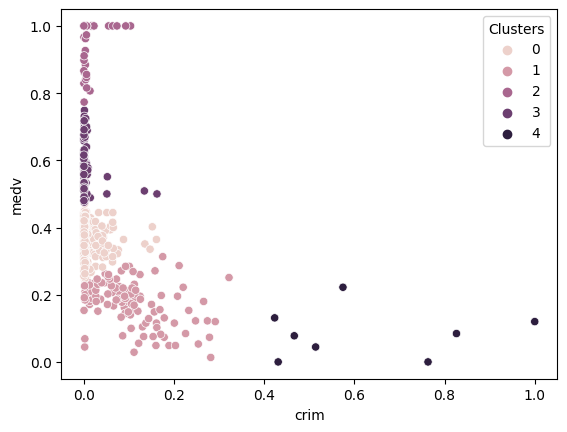

In [29]:
sns.scatterplot(x="crim",y = "medv",hue='Clusters',data=df)

In [30]:
k = range(2,12)

In [34]:
nag = []
for i in k:
    m = KMeans(n_clusters = i)
    m.fit(df[['crim','medv']])
    nag.append(m.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [35]:
print(nag)

[12.318699128315318, 7.443919111501261, 5.129142948698655, 3.1141753101202747, 2.3470857561569054, 1.9039578965228898, 1.6157388493560005, 1.3418599328100873, 1.203070924503333, 1.0440251915935463]


In [36]:
import matplotlib.pyplot as plt

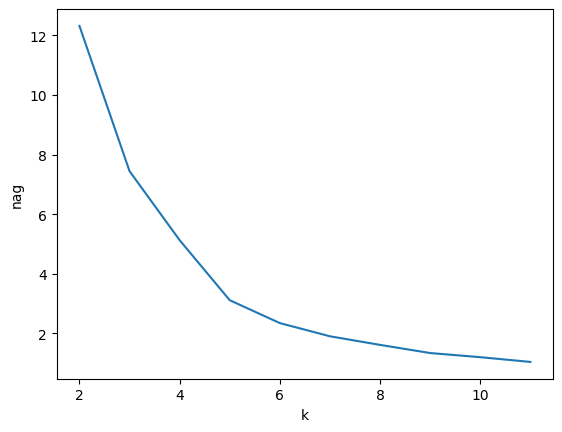

In [38]:
plt.xlabel('k')
plt.ylabel("nag")
plt.plot(k,nag)